# Pion $\phi$ in $q$-frame

last edit Apr-7, 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;

%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

# (1) Load data 
1. Measured data from 1 run of 10.2 GeV
2. Simulated data from GEMC simulation of uniform pion direction

In [2]:
load_SIDIS_data( Nruns = 1)

Run number  6420 (1/1 runs)
Loaded 224 (e,e piplus ) events and  48 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 90 (e,e piminus ) events and  7 (e,e piminus n), events
retained 7 (e,e piminus n), events with Pn > 275 MeV/c
Done loading files.


In [17]:
apply_further_selection_cuts_to_data(fdebug=2)

(e,e piplus )
224 events before cut
149 events after p-theta cut (66.5 %)
138 events after M_X cut (61.6 %)
(e,e piminus )
90 events before cut
86 events after p-theta cut (95.6 %)
82 events after M_X cut (91.1 %)


# (2) Plot

In [59]:
theta_bins   = np.linspace(0,60,61)
theta_xticks = np.linspace(0,60,5)
theta_xlim   = [0,60]

In [60]:
pi_ch = 'piplus'
df  = e_e_pi_pass_cuts[pi_ch];

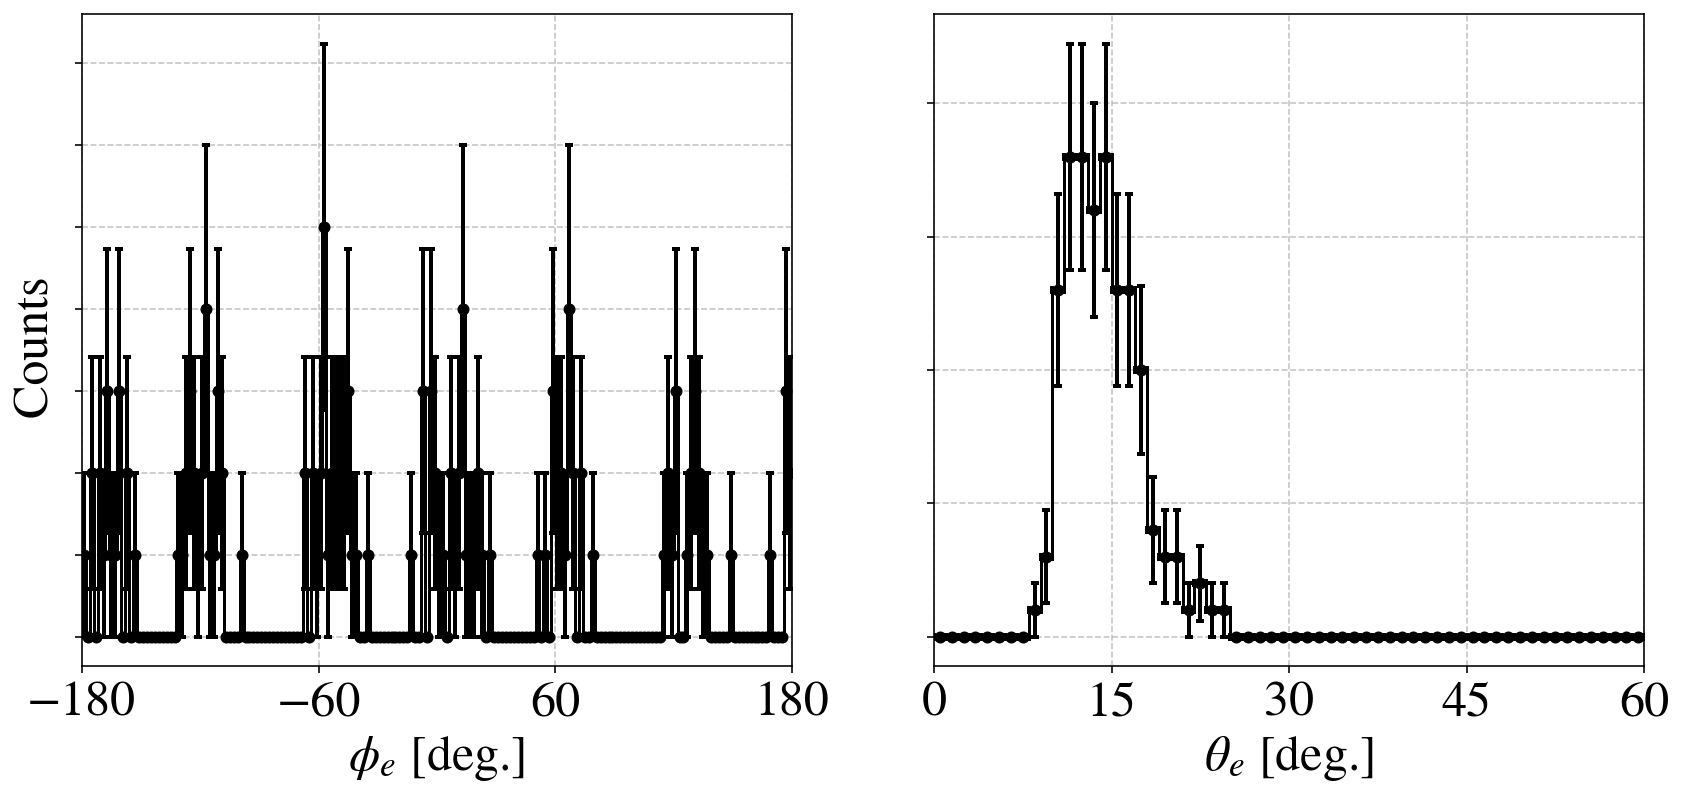

In [61]:
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,2,1)
plot_step_hist( df.e_Phi*r2d, bins=phi_bins, color='k')
set_axes(ax,'$\phi_e$ [deg.]','Counts ',remove_ticks_y=True,title='', 
         do_add_grid=True,do_add_legend=False, xlim=phi_xlim, 
         xticks=phi_xticks
        );
ax = fig.add_subplot(1,2,2)
plot_step_hist( df.e_Theta*r2d, bins=theta_bins, color='k')
set_axes(ax,'$\\theta_e$ [deg.]',' ',remove_ticks_y=True,title='', 
         do_add_grid=True,do_add_legend=False, xlim=theta_xlim,          
         xticks=theta_xticks
        );

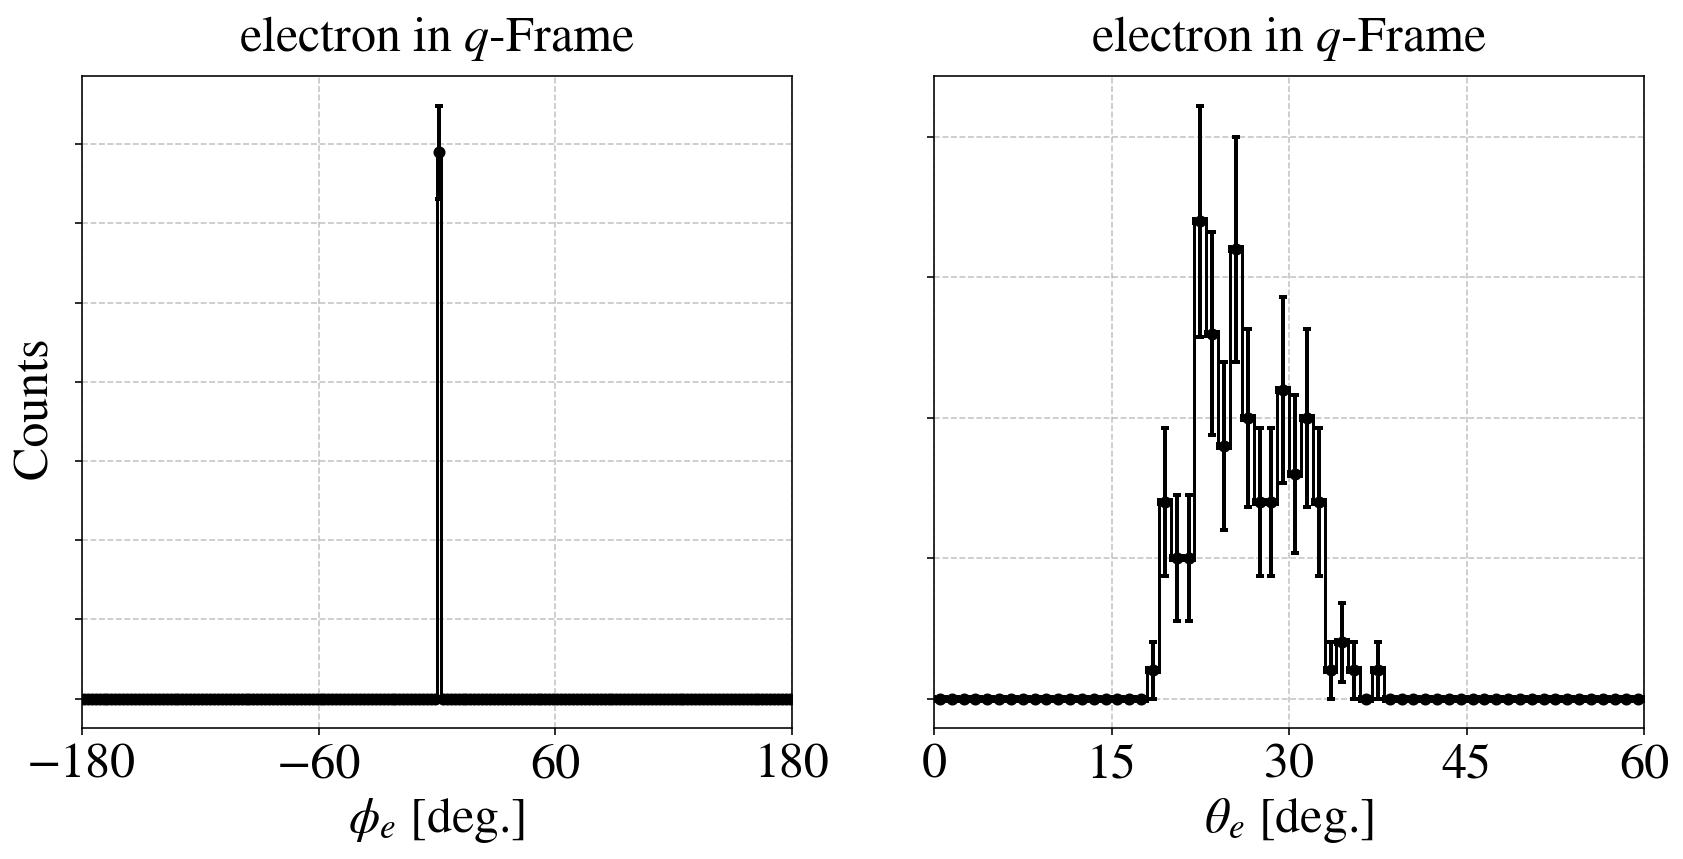

In [62]:
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,2,1)
plot_step_hist( df.e_Phi_qFrame*r2d, bins=phi_bins, color='k')
set_axes(ax,'$\phi_e$ [deg.]','Counts ',remove_ticks_y=True,title='electron in $q$-Frame', 
         do_add_grid=True,do_add_legend=False, xlim=phi_xlim, 
         xticks=phi_xticks
        );
ax = fig.add_subplot(1,2,2)
plot_step_hist( df.e_Theta_qFrame*r2d, bins=theta_bins, color='k')
set_axes(ax,'$\\theta_e$ [deg.]',' ',remove_ticks_y=True,title='electron in $q$-Frame', 
         do_add_grid=True,do_add_legend=False, xlim=theta_xlim,          
         xticks=theta_xticks
        );

## Plot pions

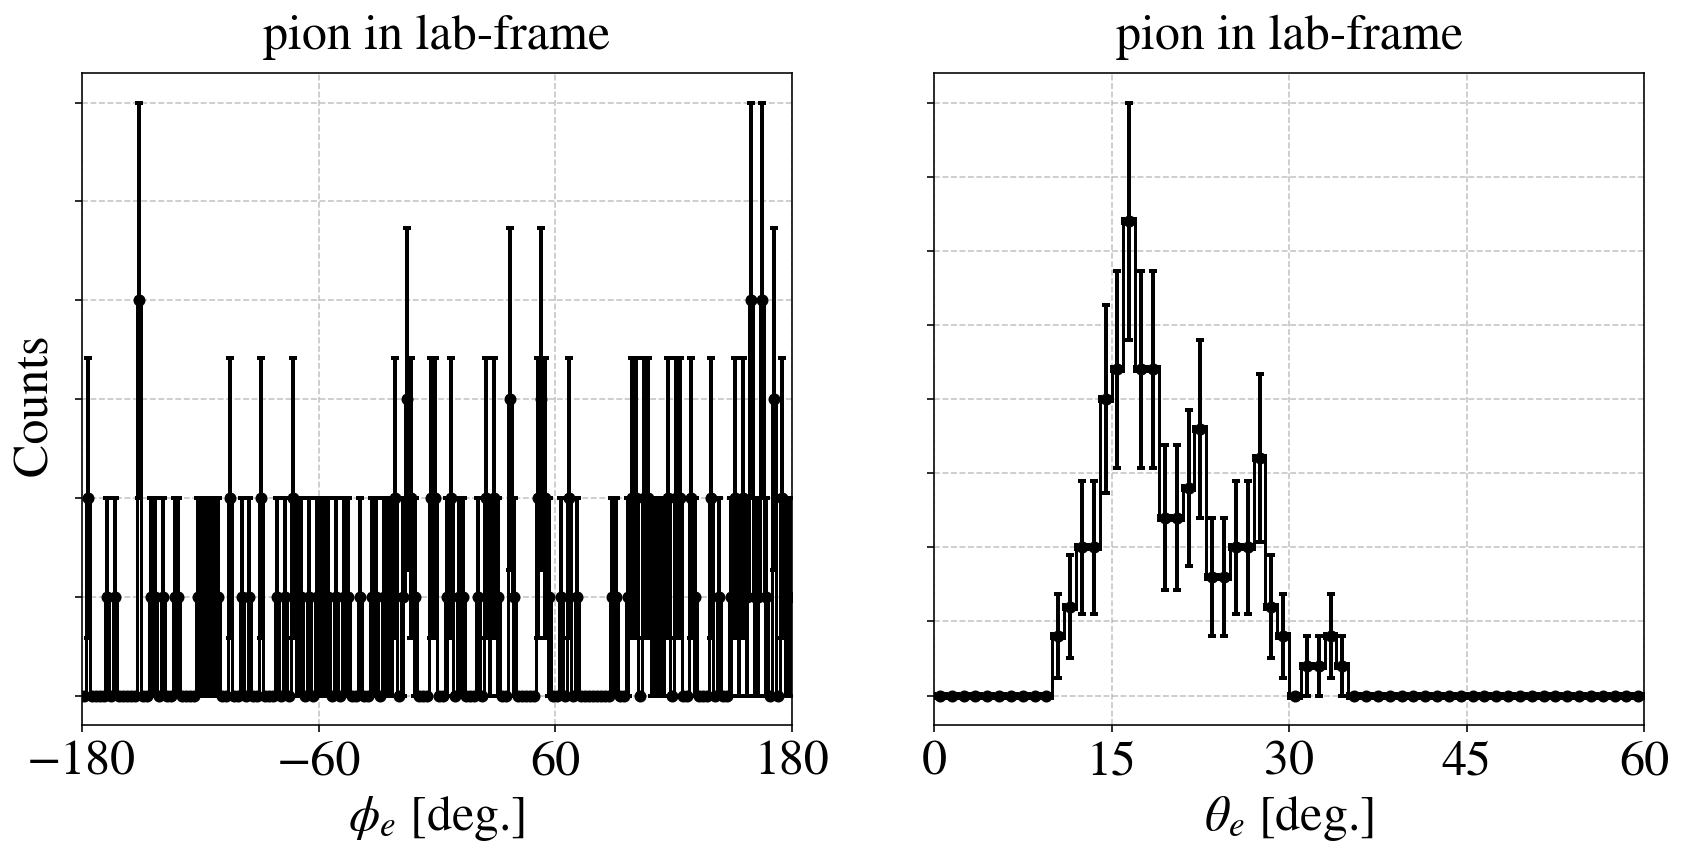

In [64]:
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,2,1)
plot_step_hist( df.pi_Phi*r2d, bins=phi_bins, color='k')
set_axes(ax,'$\phi_e$ [deg.]','Counts ',remove_ticks_y=True,title='pion in lab-frame', 
         do_add_grid=True,do_add_legend=False, xlim=phi_xlim, 
         xticks=phi_xticks
        );
ax = fig.add_subplot(1,2,2)
plot_step_hist( df.pi_Theta*r2d, bins=theta_bins, color='k')
set_axes(ax,'$\\theta_e$ [deg.]',' ',remove_ticks_y=True,title='pion in lab-frame', 
         do_add_grid=True,do_add_legend=False, xlim=theta_xlim,          
         xticks=theta_xticks
        );

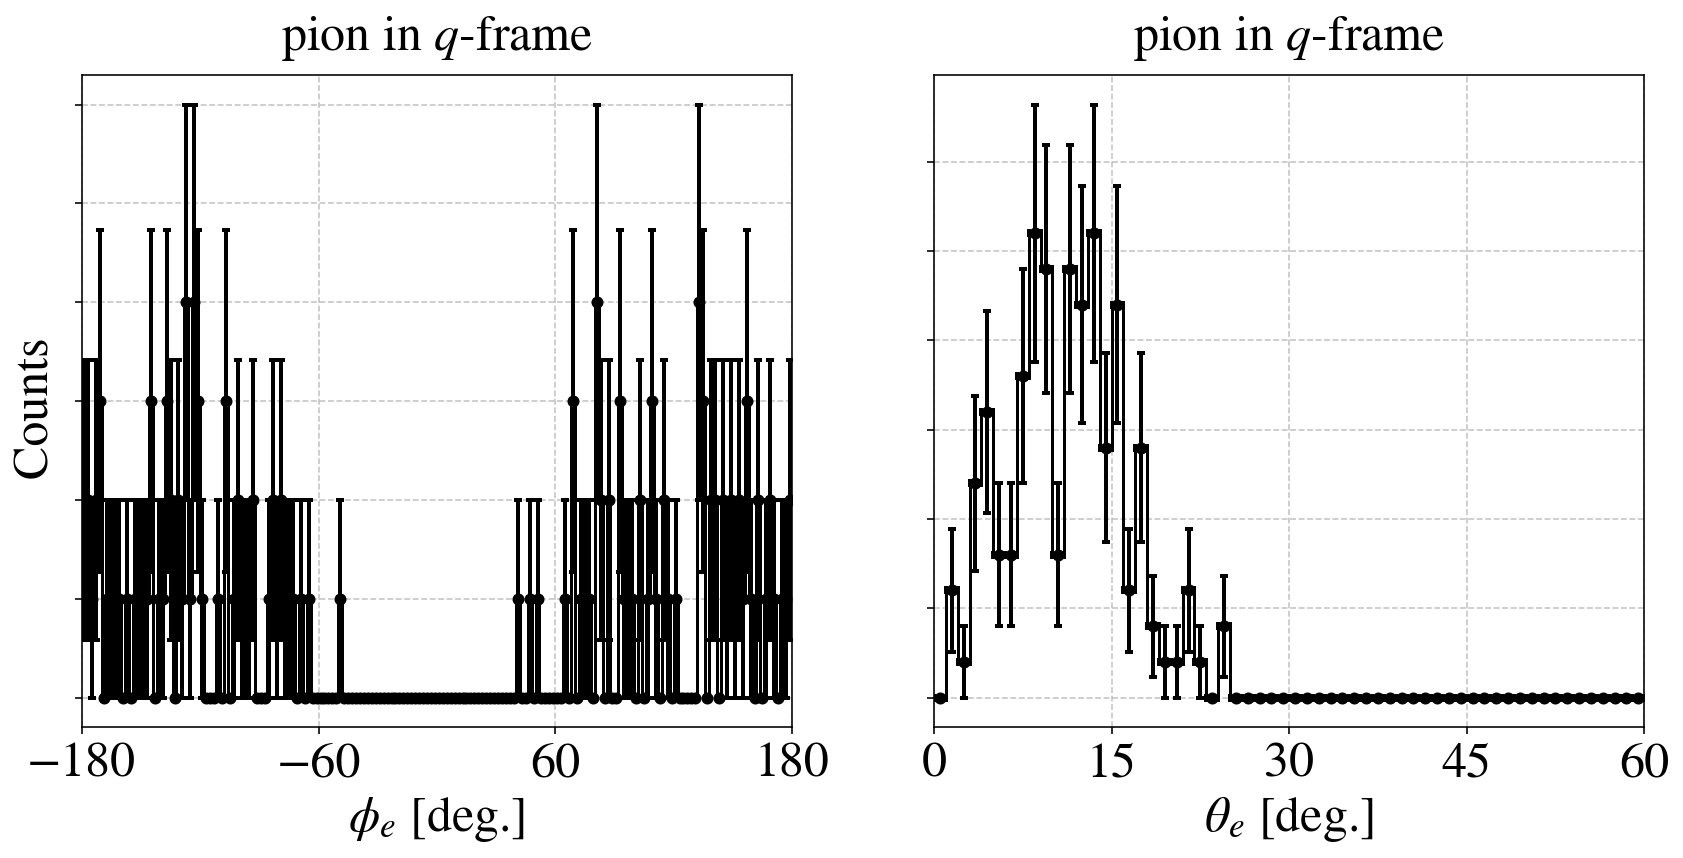

In [65]:
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,2,1)
plot_step_hist( df.pi_Phi_qFrame*r2d, bins=phi_bins, color='k')
set_axes(ax,'$\phi_e$ [deg.]','Counts ',remove_ticks_y=True,title='pion in $q$-frame', 
         do_add_grid=True,do_add_legend=False, xlim=phi_xlim, 
         xticks=phi_xticks
        );
ax = fig.add_subplot(1,2,2)
plot_step_hist( df.pi_Theta_qFrame*r2d, bins=theta_bins, color='k')
set_axes(ax,'$\\theta_e$ [deg.]',' ',remove_ticks_y=True,title='pion in $q$-frame', 
         do_add_grid=True,do_add_legend=False, xlim=theta_xlim,          
         xticks=theta_xticks
        );

In [3]:
load_MC_data_for_acceptance_correction()

piplus: 1000445 generated events
piminus: 1067457 generated events
piplus
460263 events in which electron was reconsutrcted
65.4 % ( 300989 events) include pi reconstructed
64.2 % ( 295313 events) include pi passed fiducial cuts
63.7 % ( 293095 events) include pi passed PID cuts
62.5 % ( 287835 events) include pi passed all cuts
piminus
456464 events in which electron was reconsutrcted
61.3 % ( 279615 events) include pi reconstructed
60.1 % ( 274174 events) include pi passed fiducial cuts
59.8 % ( 272901 events) include pi passed PID cuts
58.7 % ( 267794 events) include pi passed all cuts


### (1.1) Apply selection cuts not previously imposed

(e,e piplus )
644241 events before cut
441990 events after p-theta cut (68.6 %)
398534 events after M_X cut (61.9 %)
(e,e piminus )
274002 events before cut
265536 events after p-theta cut (96.9 %)
245302 events after M_X cut (89.5 %)
(e,e piplus ) in uniform GEMC simulation
460263 events before cut
151068 events after p-theta cut (32.8 %)
127866 events after M_X cut (27.8 %)
(e,e piminus ) in uniform GEMC simulation
456464 events before cut
146857 events after p-theta cut (32.2 %)
125026 events after M_X cut (27.4 %)
dict_keys(['piplus', 'piminus'])


# (2) Compute acceptance acceptance correction as a function of $\phi$
(Compute and plot it)

For all simulated events

Important note: the acceptance correciton is computed in fixed bins of $\phi$

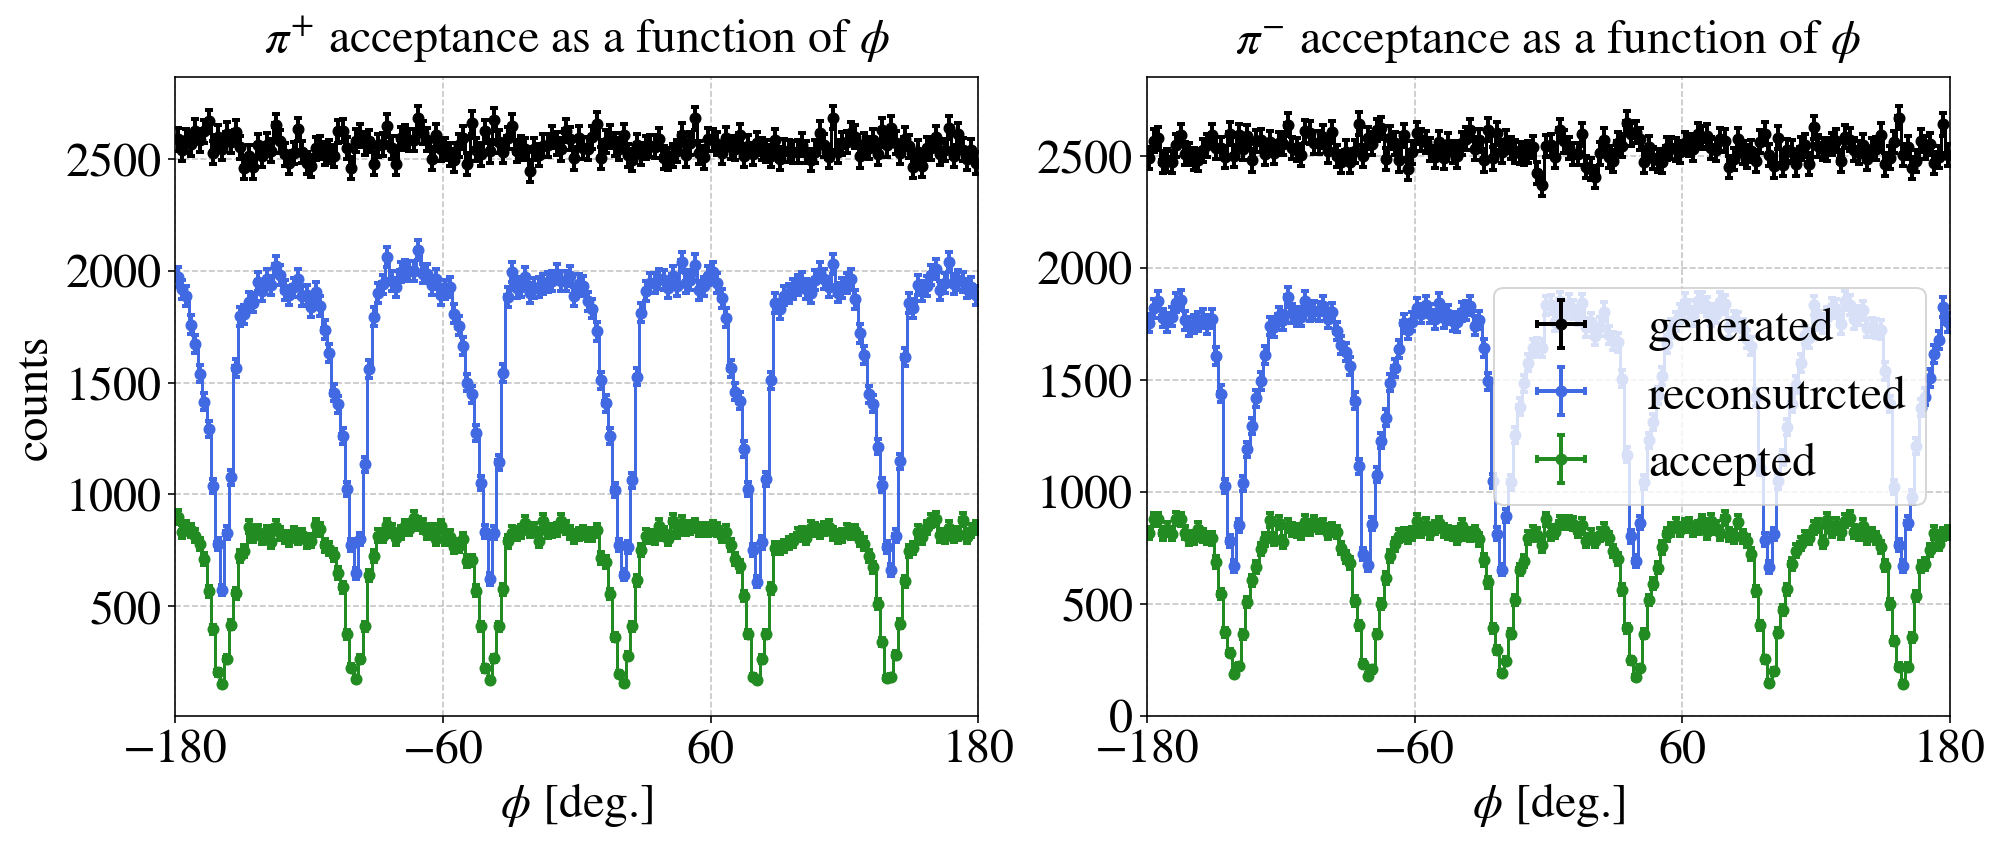

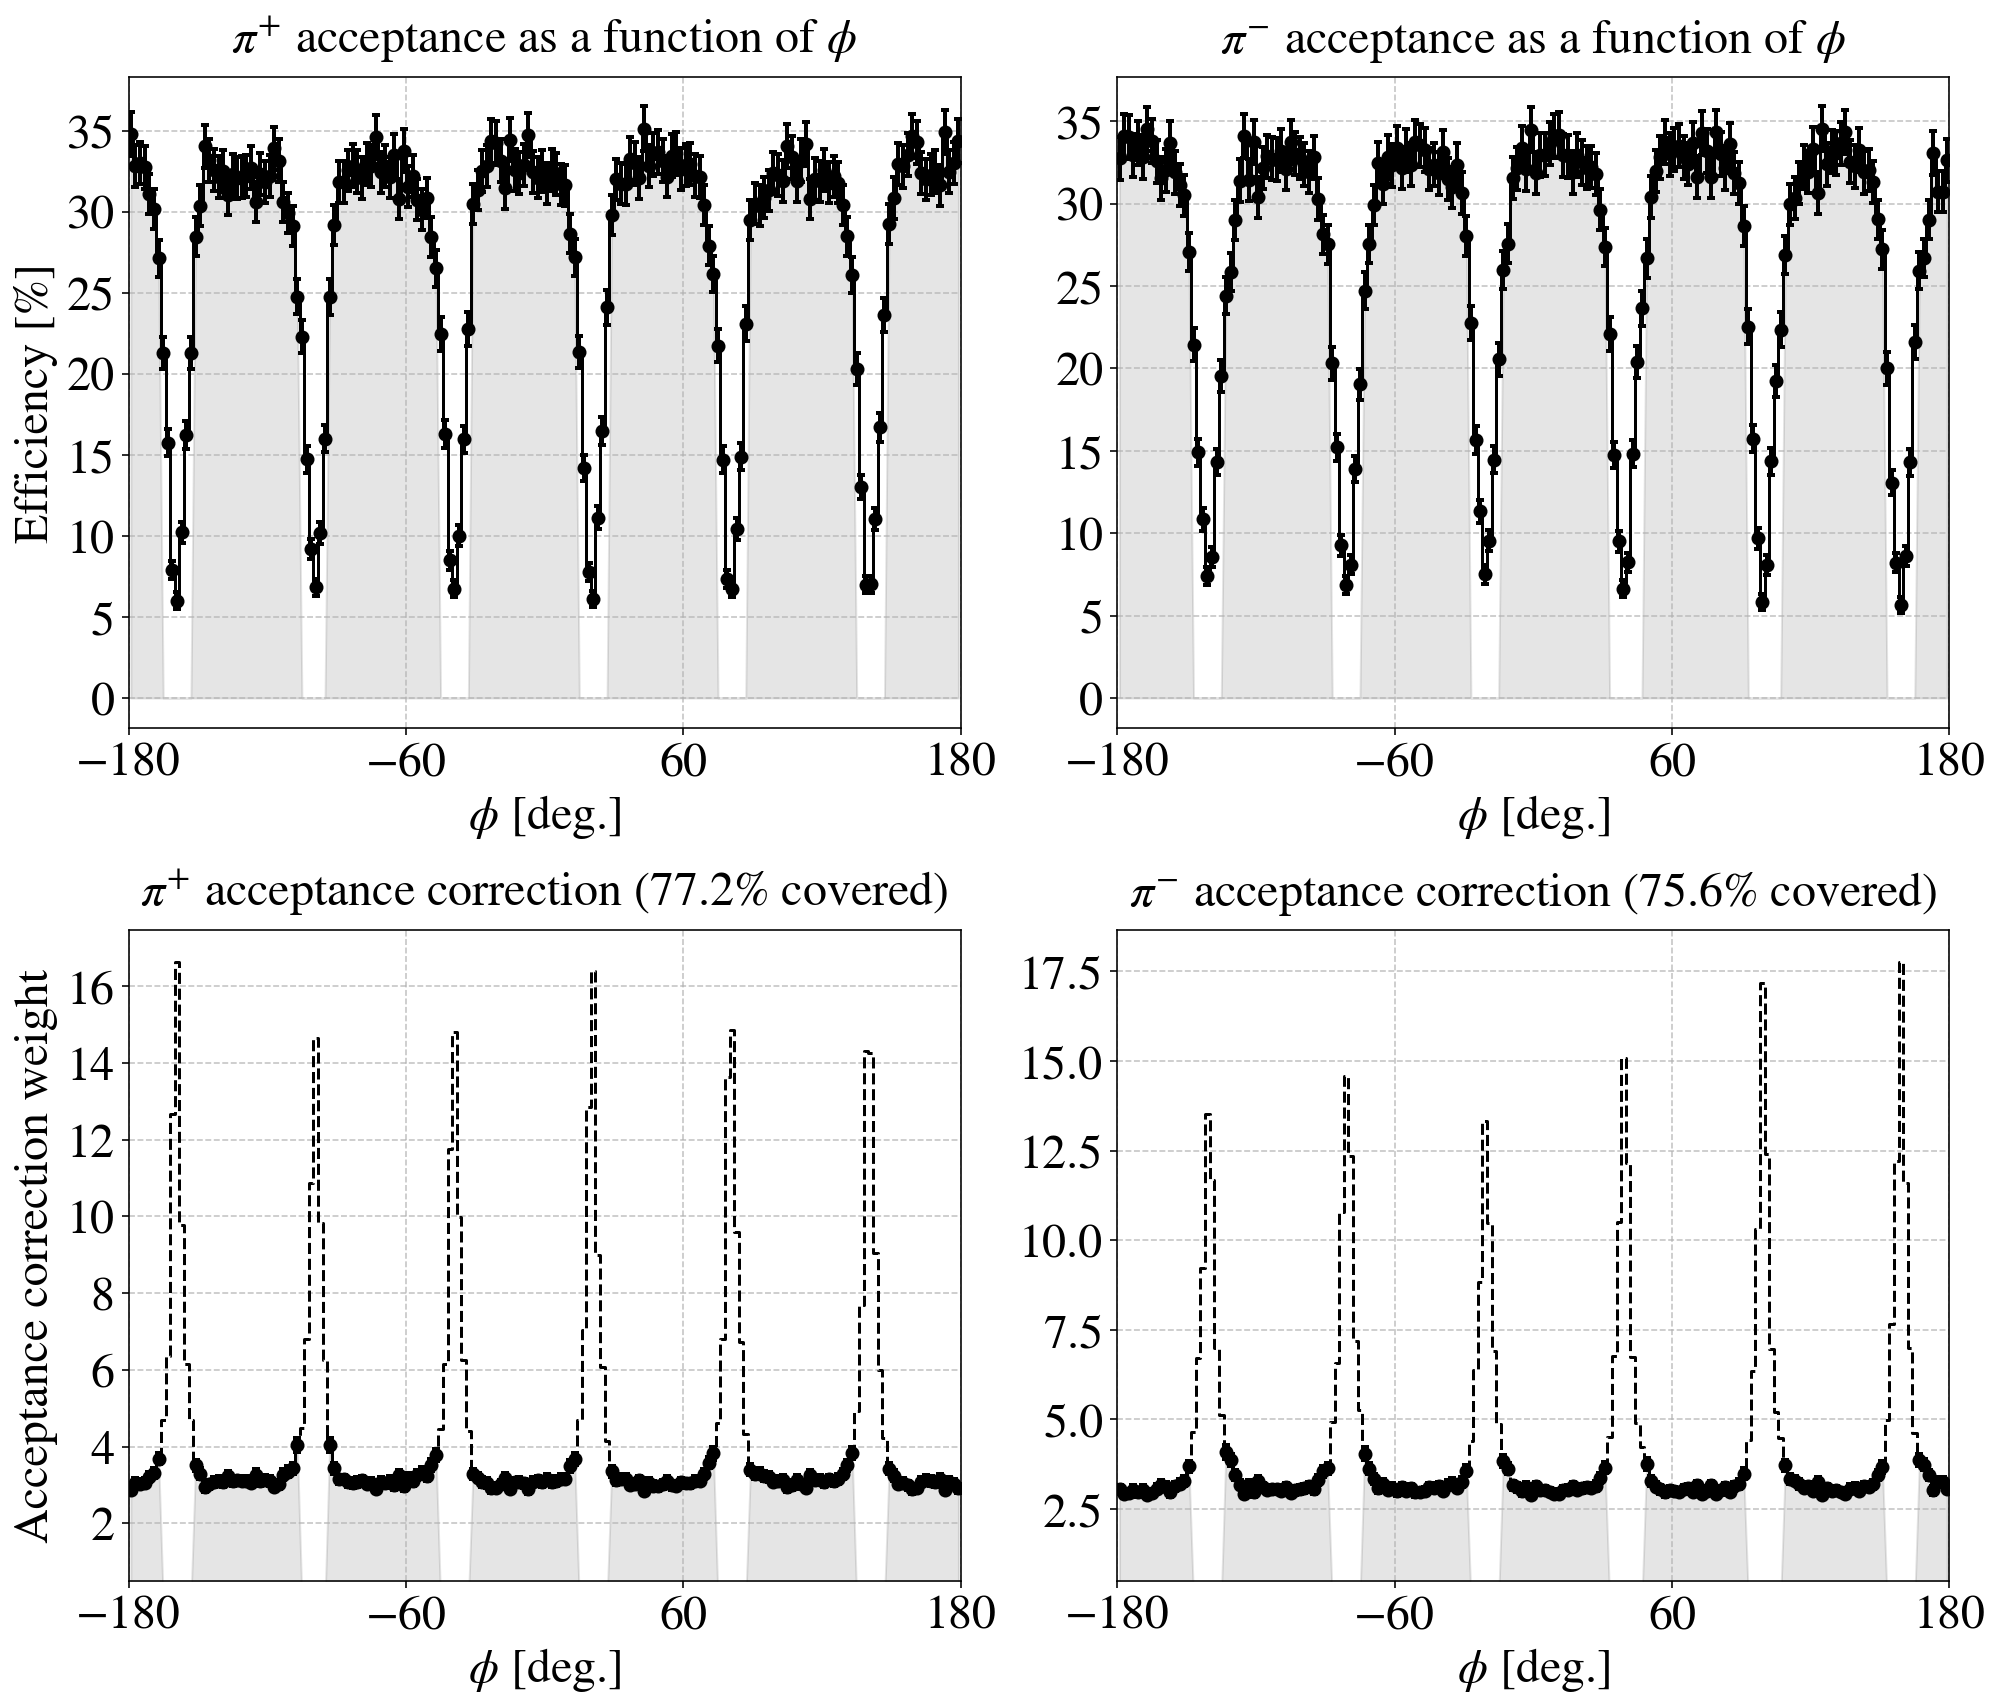

In [23]:
ComputeAcceptanceCorrectionAsFunctionOfPhi()

# (3) Check the acceptance correction
To check the correction, plot the data as a function of $\phi$, where each event is weighted by its own correction factor

### (3.1) Plot $\phi$ distribution of MC before and after acceptance correction

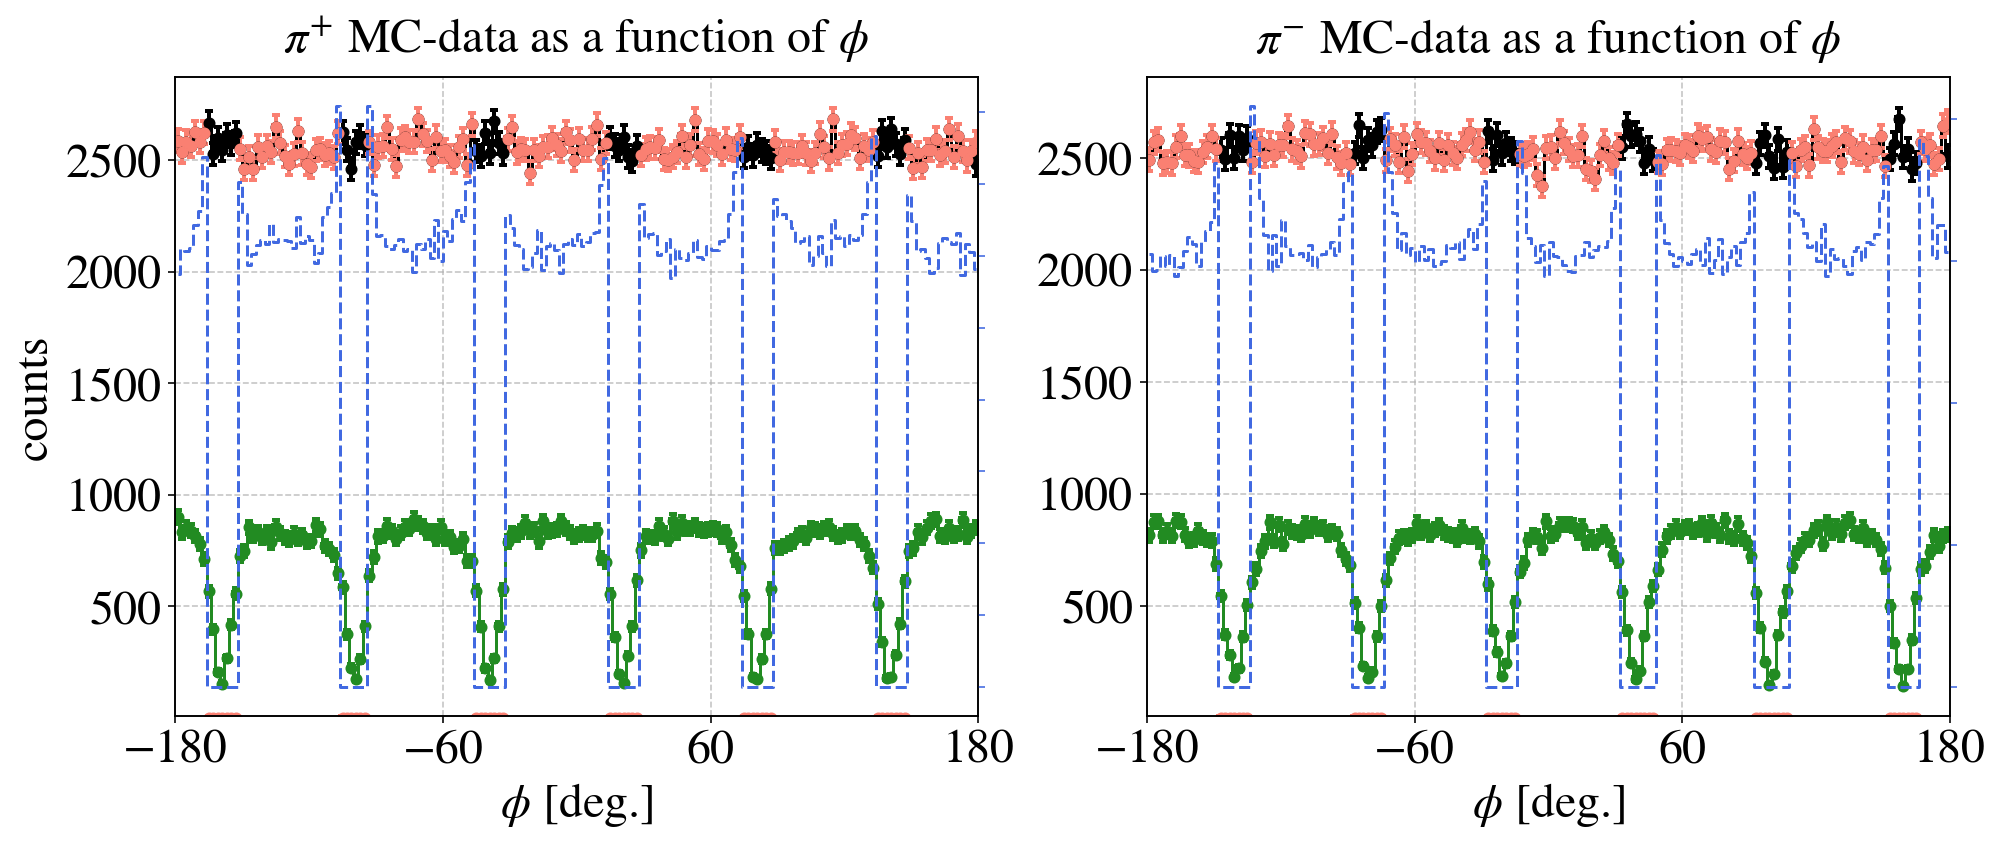

In [25]:
var_gen      = 'pi_Phi_g'
label        = '$\phi$'
units        = '[deg.]'
scale_factor = r2d
do_correct_directly = False

fig = plt.figure(figsize=(14,6));
for pi_ch,pi_charge_label,pi_idx in zip(pi_charge_names,pi_labels,range(2)):
    df_gen  = e_e_pi_GEMC[pi_ch];
    x_gen   = df_gen[var_gen]
    phi_gen = x_gen*scale_factor
    
    df_acc     = e_e_pi_GEMC_pass_cuts[pi_ch][e_e_pi_GEMC_pass_cuts[pi_ch].pi_passed_cuts==1];        
    x_acc      = df_acc[var_gen]    
    phi_acc    = x_acc*scale_factor
    w_acc_corr = [Compute_acceptance_correction_weight( pi_ch, phi ) for phi in phi_acc]

    ax = fig.add_subplot(1,2,pi_idx+1)
    plot_step_hist( phi_gen, phi_bins, weights=None,       color='k',           label='generated')
    plot_step_hist( phi_acc, phi_bins, weights=None,       color='forestgreen', label='accepted')            
    plot_step_hist( phi_acc, phi_bins, weights=w_acc_corr, color='salmon',      label='corrected', do_plot_step=False)

    if do_correct_directly:
        plt.step( phi_centers, h[pi_ch+'acc']*AccCorrec[pi_ch], color='red', where='mid', label='corrected directly', linewidth=3 )
        
    set_axes(ax,label + ' ' + units,'counts' if pi_idx==0 else '',             
             do_add_legend=False,             
             title='$'+pi_charge_label+'$ MC-data as a function of '+label,
             fontsize=24, 
             do_add_grid=True,xlim=phi_xlim,
             xticks=phi_xticks, ylim=(10,np.max(ax.get_ylim())))
    # if pi_idx==1: ax.legend(bbox_to_anchor=(1.5,1.5),loc='right',fontsize=22)
    
    
    # acceptance correction weight
    ax2 = ax.twinx()
    # ax2.step ( phi_centers, AccCorrec[pi_ch], '--', color='royalblue', where='mid', label=None )
    ax2.step ( phi_centers, AccCorrecTightFiducial[pi_ch], '--', color='royalblue', where='mid', label=None )

    set_axes(ax2,label + ' ' + units,'Acceptance correction' if pi_idx==2 else '',
             ticks_color='royalblue',
             fontsize=20, 
             remove_ticks_y=False if pi_idx==2 else True)
    

plt.tight_layout();

[  0   5  10  30  90 150 175 178]
[3.05392157 3.04428044 3.12311558 3.28957529 3.13653137 3.00235849
 3.44339623 3.25369458]


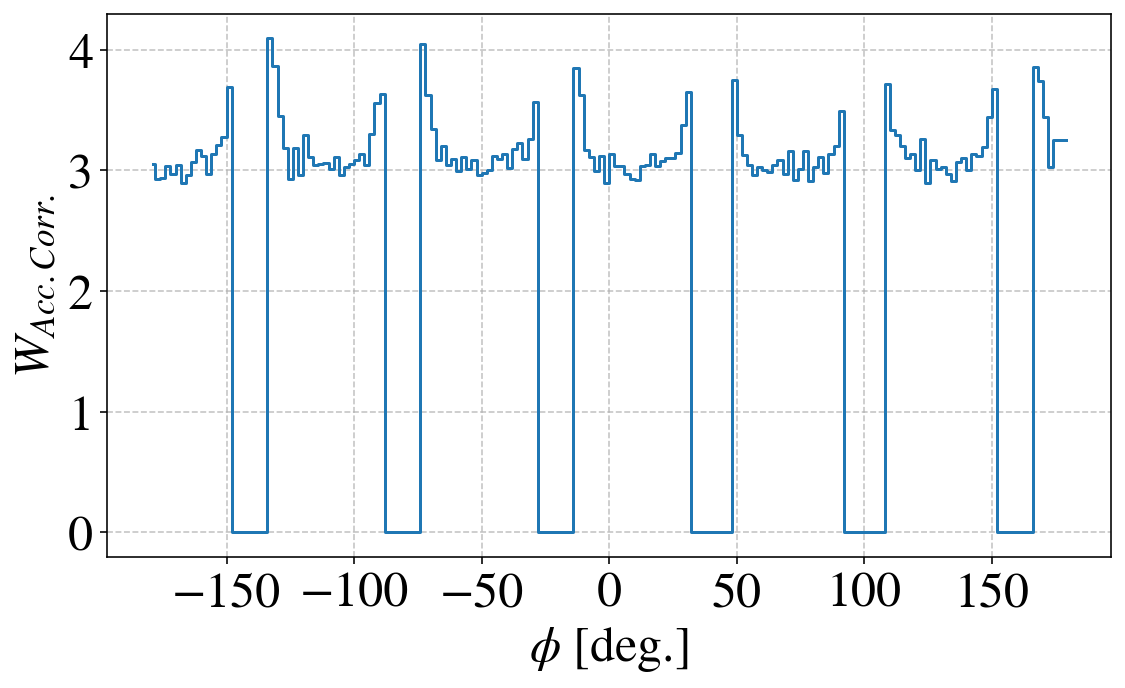

In [26]:
bin_indices = Find_phi_bin( [-180,-170,-160,-120,0,120,170,181] )
print(bin_indices)
print(AccCorrecTightFiducial[pi_ch][bin_indices])
# np.max(df_acc[var_gen][0:10]*r2d)
# print(phi_centers[Nbins-1])

W_acc_corr = Compute_acceptance_correction_weight( pi_ch, phi_centers )
fig,ax=plt.subplots(figsize=(9,5))
plt.step( phi_centers, W_acc_corr, where='mid' );
set_axes(ax,'$\phi$ [deg.]','$W_{Acc. Corr.}$',do_add_grid=True);

### (3.2) Correct $\pi^{\pm}$ data and plot $\phi$ distribution

#### Compute correction for a single event as example

In [27]:
event = e_e_pi[pi_ch].iloc[1]
phi = float(event.pi_Phi)*r2d
print('event phi: ',phi ,'deg.')

phi_bin = Find_phi_bin( phi )
print('phi bin: ',phi_bin)

W_acc_corr = Compute_acceptance_correction_weight( pi_ch, phi )
print('W_acc_corr:',W_acc_corr)

event phi:  60.863587703361965 deg.
phi bin:  120
W_acc_corr: 3.0047003525264393


#### Compute correction for all events

In [28]:
for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    # print(pi_charge_name)
    df = e_e_pi_pass_cuts[pi_charge_name];
    phis = np.array( df.pi_Phi )*r2d
    acc_corr_weights = [ Compute_acceptance_correction_weight( pi_charge_name, phi ) for phi in phis ]
    df = df.assign(Weight_AccCorrec = acc_corr_weights)
    e_e_pi_pass_cuts[pi_charge_name] = df
    # display(df)
    print('Computing acceptance correction weights for ',pi_charge_name,'.')
#}
print('Done computing acceptance correction weights.')

Computing acceptance correction weights for  piplus .
Computing acceptance correction weights for  piminus .
Done computing acceptance correction weights.


#### Plot $\phi$ distribution with and without application of the acceptance correction weights
Do not correct for fraction of $\phi$ area covered by acceptance distribution, as we do this globaly on the number of detected events

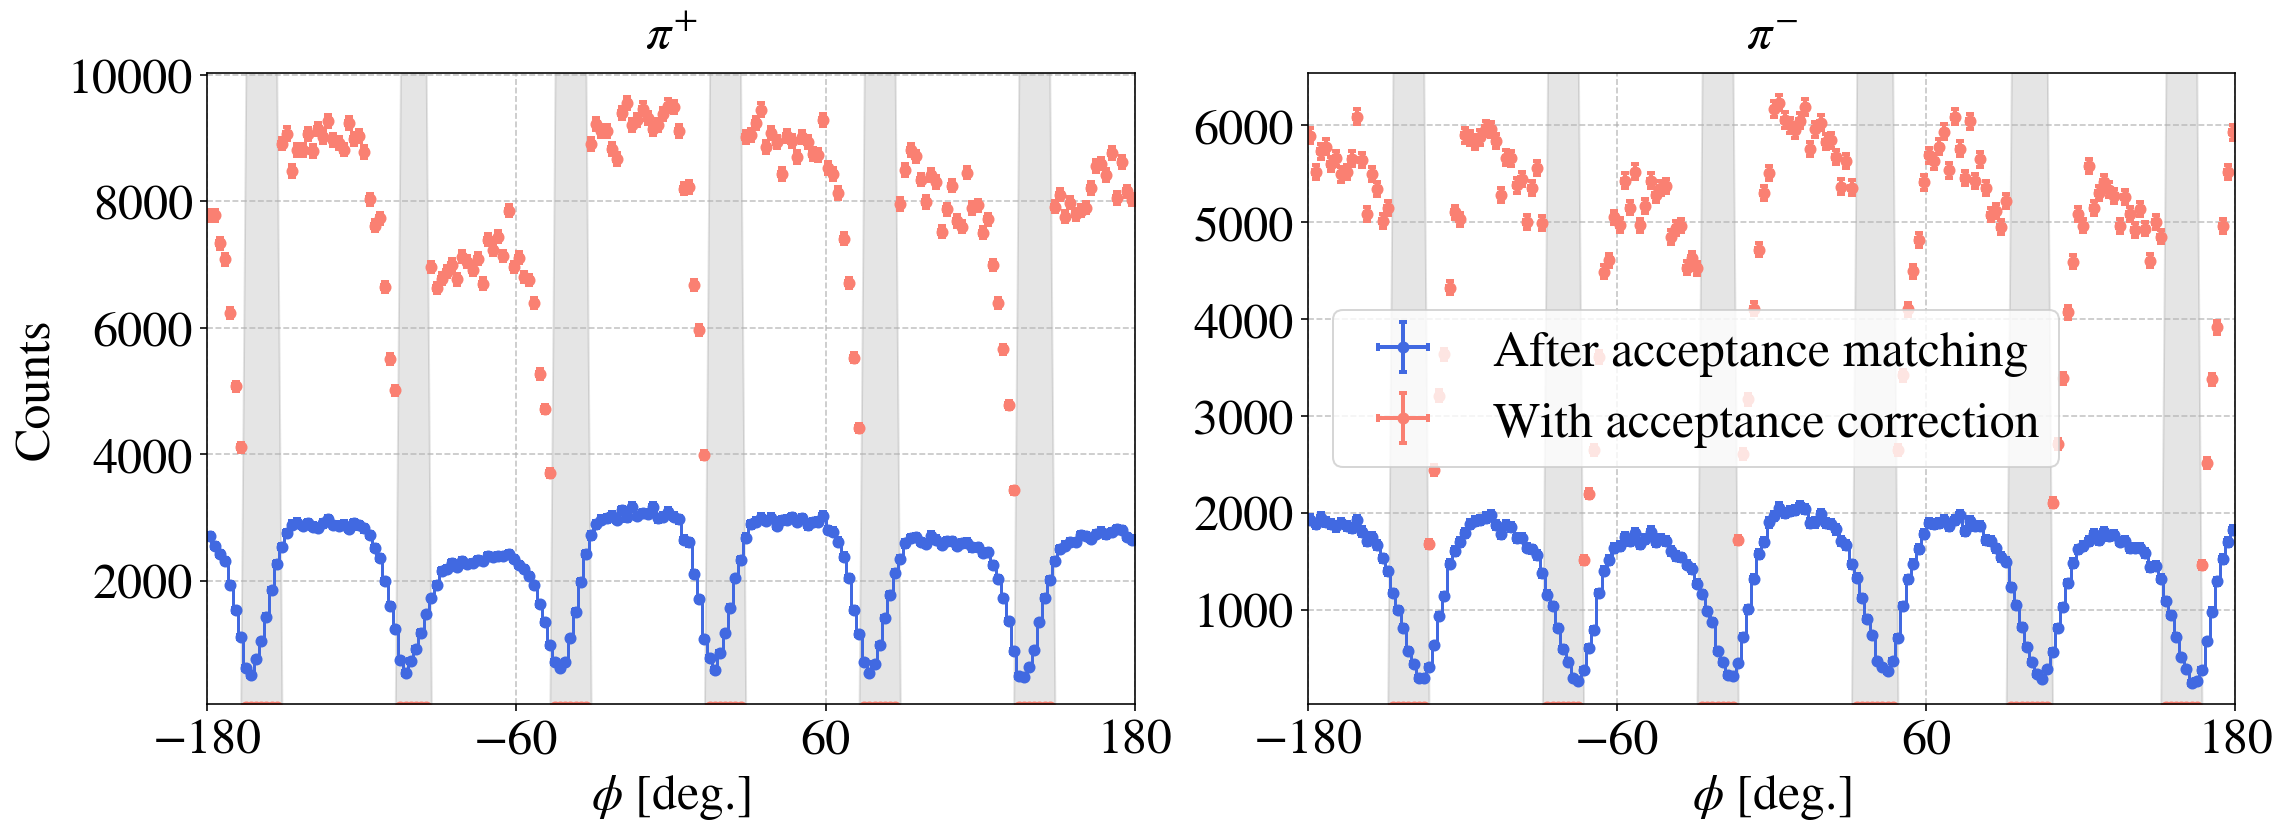

In [29]:
do_plot_before_cuts              = False
do_plot_acceptance_weight        = False
do_plot_direct_correction_in_phi = False

fig = plt.figure(figsize=(16,6));

for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    pi_ch = pi_charge_name
    ax = fig.add_subplot(1,2,pi_idx)

    if do_plot_before_cuts:
        # first plot: before p-theta acceptance matching cut
        df  = e_e_pi[pi_charge_name];
        phi = np.array(df.pi_Phi)*r2d
        weights = None
        color = 'grey'
        label = 'Before acceptance matching'
        _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights, markersize=1, alpha=0.2)

    # second plot: after acceptance matching cut, without acceptance correction
    df  = e_e_pi_pass_cuts[pi_charge_name];
    phi = np.array(df.pi_Phi)*r2d
    weights = None
    color = 'royalblue'
    label = 'After acceptance matching'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights )

    # third plot:  after acceptance matching cut, with acceptance correction
    phi = np.array(df.pi_Phi)*r2d
    weights = np.array(df.Weight_AccCorrec)
    color = 'salmon'
    label = 'With acceptance correction'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights, do_plot_step=False )

    
    # comparison plot: directly multiply the histogram by the acceptance correction
    if do_plot_direct_correction_in_phi:
        plt.step ( phi_centers, h['After acceptance matching']*AccCorrec[pi_ch], '--', color='red', where='mid', label=None )
    
    if do_plot_acceptance_weight:
        ax2 = ax.twinx()
        ax2.step ( phi_centers, AccCorrecTightFiducial[pi_ch], '--', color='forestgreen', where='mid', label=None )
        ax2.set_ylabel('Acceptance correction', color = 'forestgreen', fontsize=18)

    plt.fill_between ( phi_centers, np.zeros(len(phi_centers)), 
                      (1-TightFiducialPhi[pi_ch])*1.05*np.max(h['With acceptance correction']),                       
                      color='k', alpha=0.1)
    
    set_axes(ax, '$\phi$ [deg.]', 'Counts' if pi_idx==1 else '',
             title='$'+pi_label+'$',
             do_add_grid=True,
             do_add_legend=True if pi_idx==2 else False,
             # ylim=(100,1.05*np.max([np.max(h['Before acceptance matching']),np.max(h['With acceptance correction'])])),
             ylim=(0.1*np.min(h['After acceptance matching']),1.05*np.max(h['With acceptance correction'])),
             xlim=phi_xlim,
             xticks=phi_xticks)
#}

plt.tight_layout()

# Pion acceptance at the sector centers is stronger than in their edges - an ill-modeled effect in GEMC

#### density distribution (normalized to unity)

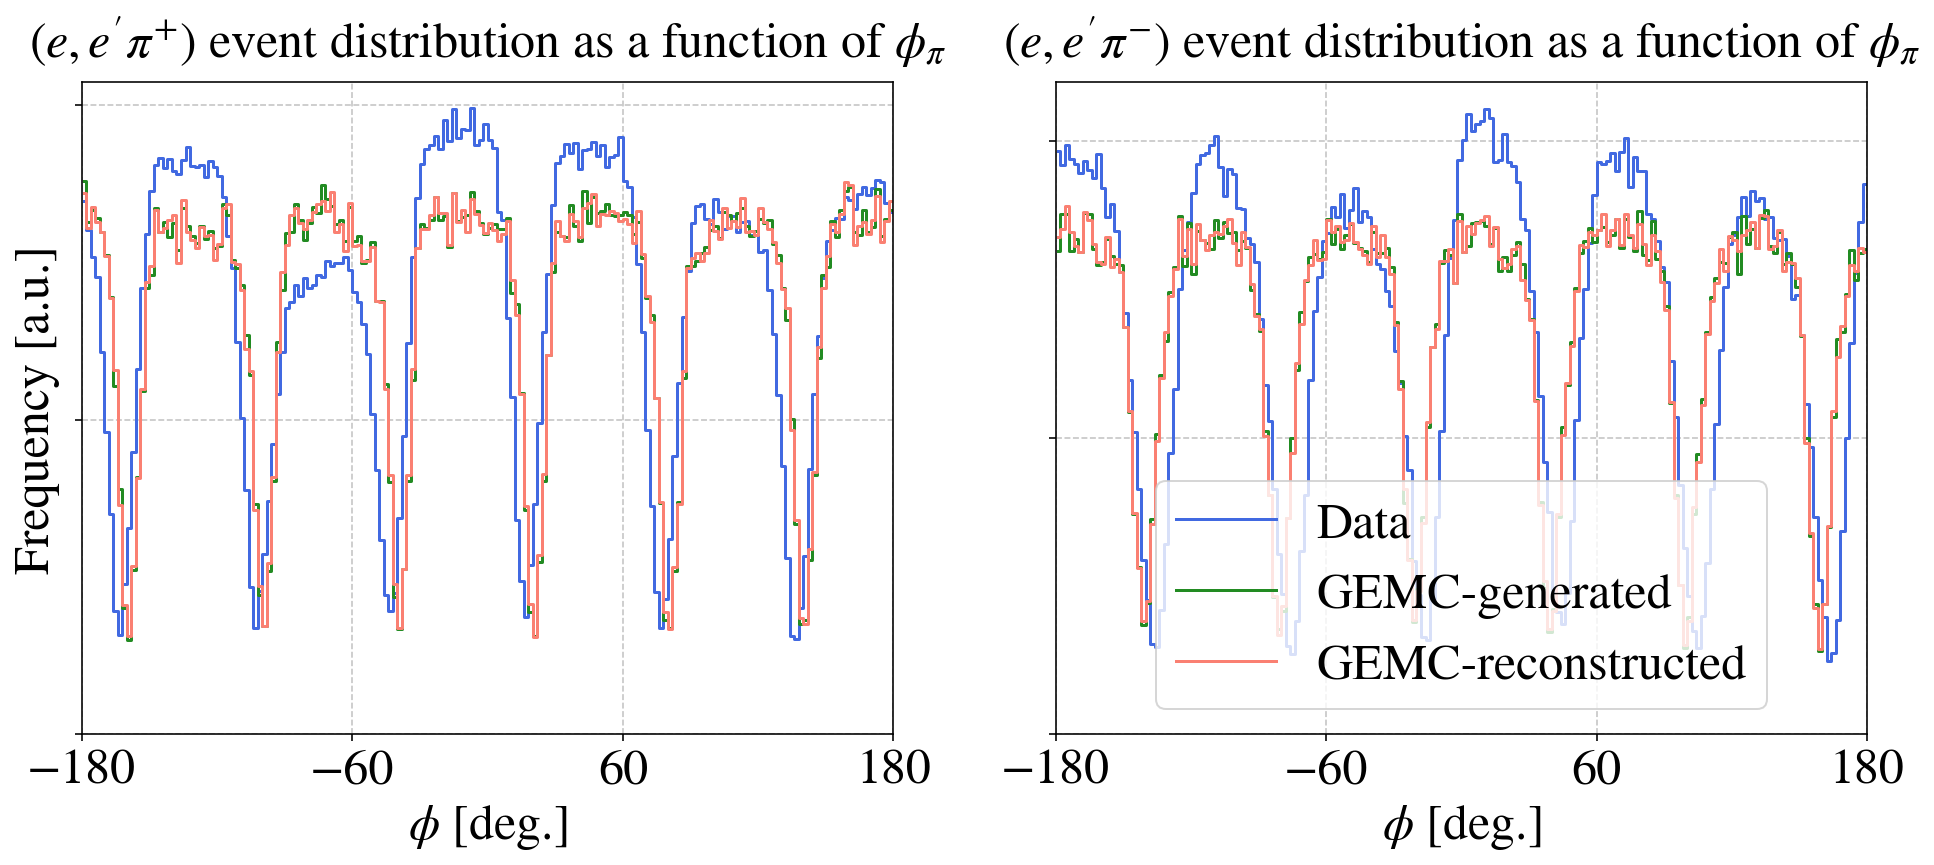

In [30]:
fig = plt.figure(figsize=(16,6));

for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)
    
    # second plot: data
    df  = e_e_pi_pass_cuts[pi_ch];
    phi = np.array(df.pi_Phi)*r2d
    plot_step_hist( x_arr=phi,  bins=phi_bins , label='Data',  color='royalblue', do_plot_errorbar=False, density=True)
    
    df  = e_e_pi_GEMC_pass_cuts[pi_ch];
    phi_g = np.array(df.pi_Phi_g)*r2d
    plot_step_hist( x_arr=phi_g,  bins=phi_bins , label='GEMC-generated',  color='forestgreen', do_plot_errorbar=False, density=True)

    phi_rec = np.array(df.pi_Phi)*r2d
    plot_step_hist( x_arr=phi_rec,  bins=phi_bins , label='GEMC-reconstructed',  color='salmon', do_plot_errorbar=False, density=True)

    set_axes(ax, '$\phi$ [deg.]', 'Frequency [a.u.]' if pi_idx==1 else '',
             title="$(e,e'"+pi_label+')$ event distribution as a function of $\phi_\pi$',
             do_add_grid=True,remove_ticks_y=True,
             do_add_legend=True if pi_idx==2 else False,
             yticks=[0,4e-3,8e-3],
             xlim=phi_xlim,
             xticks=phi_xticks)

#### Equalize to plateau in GEMC events

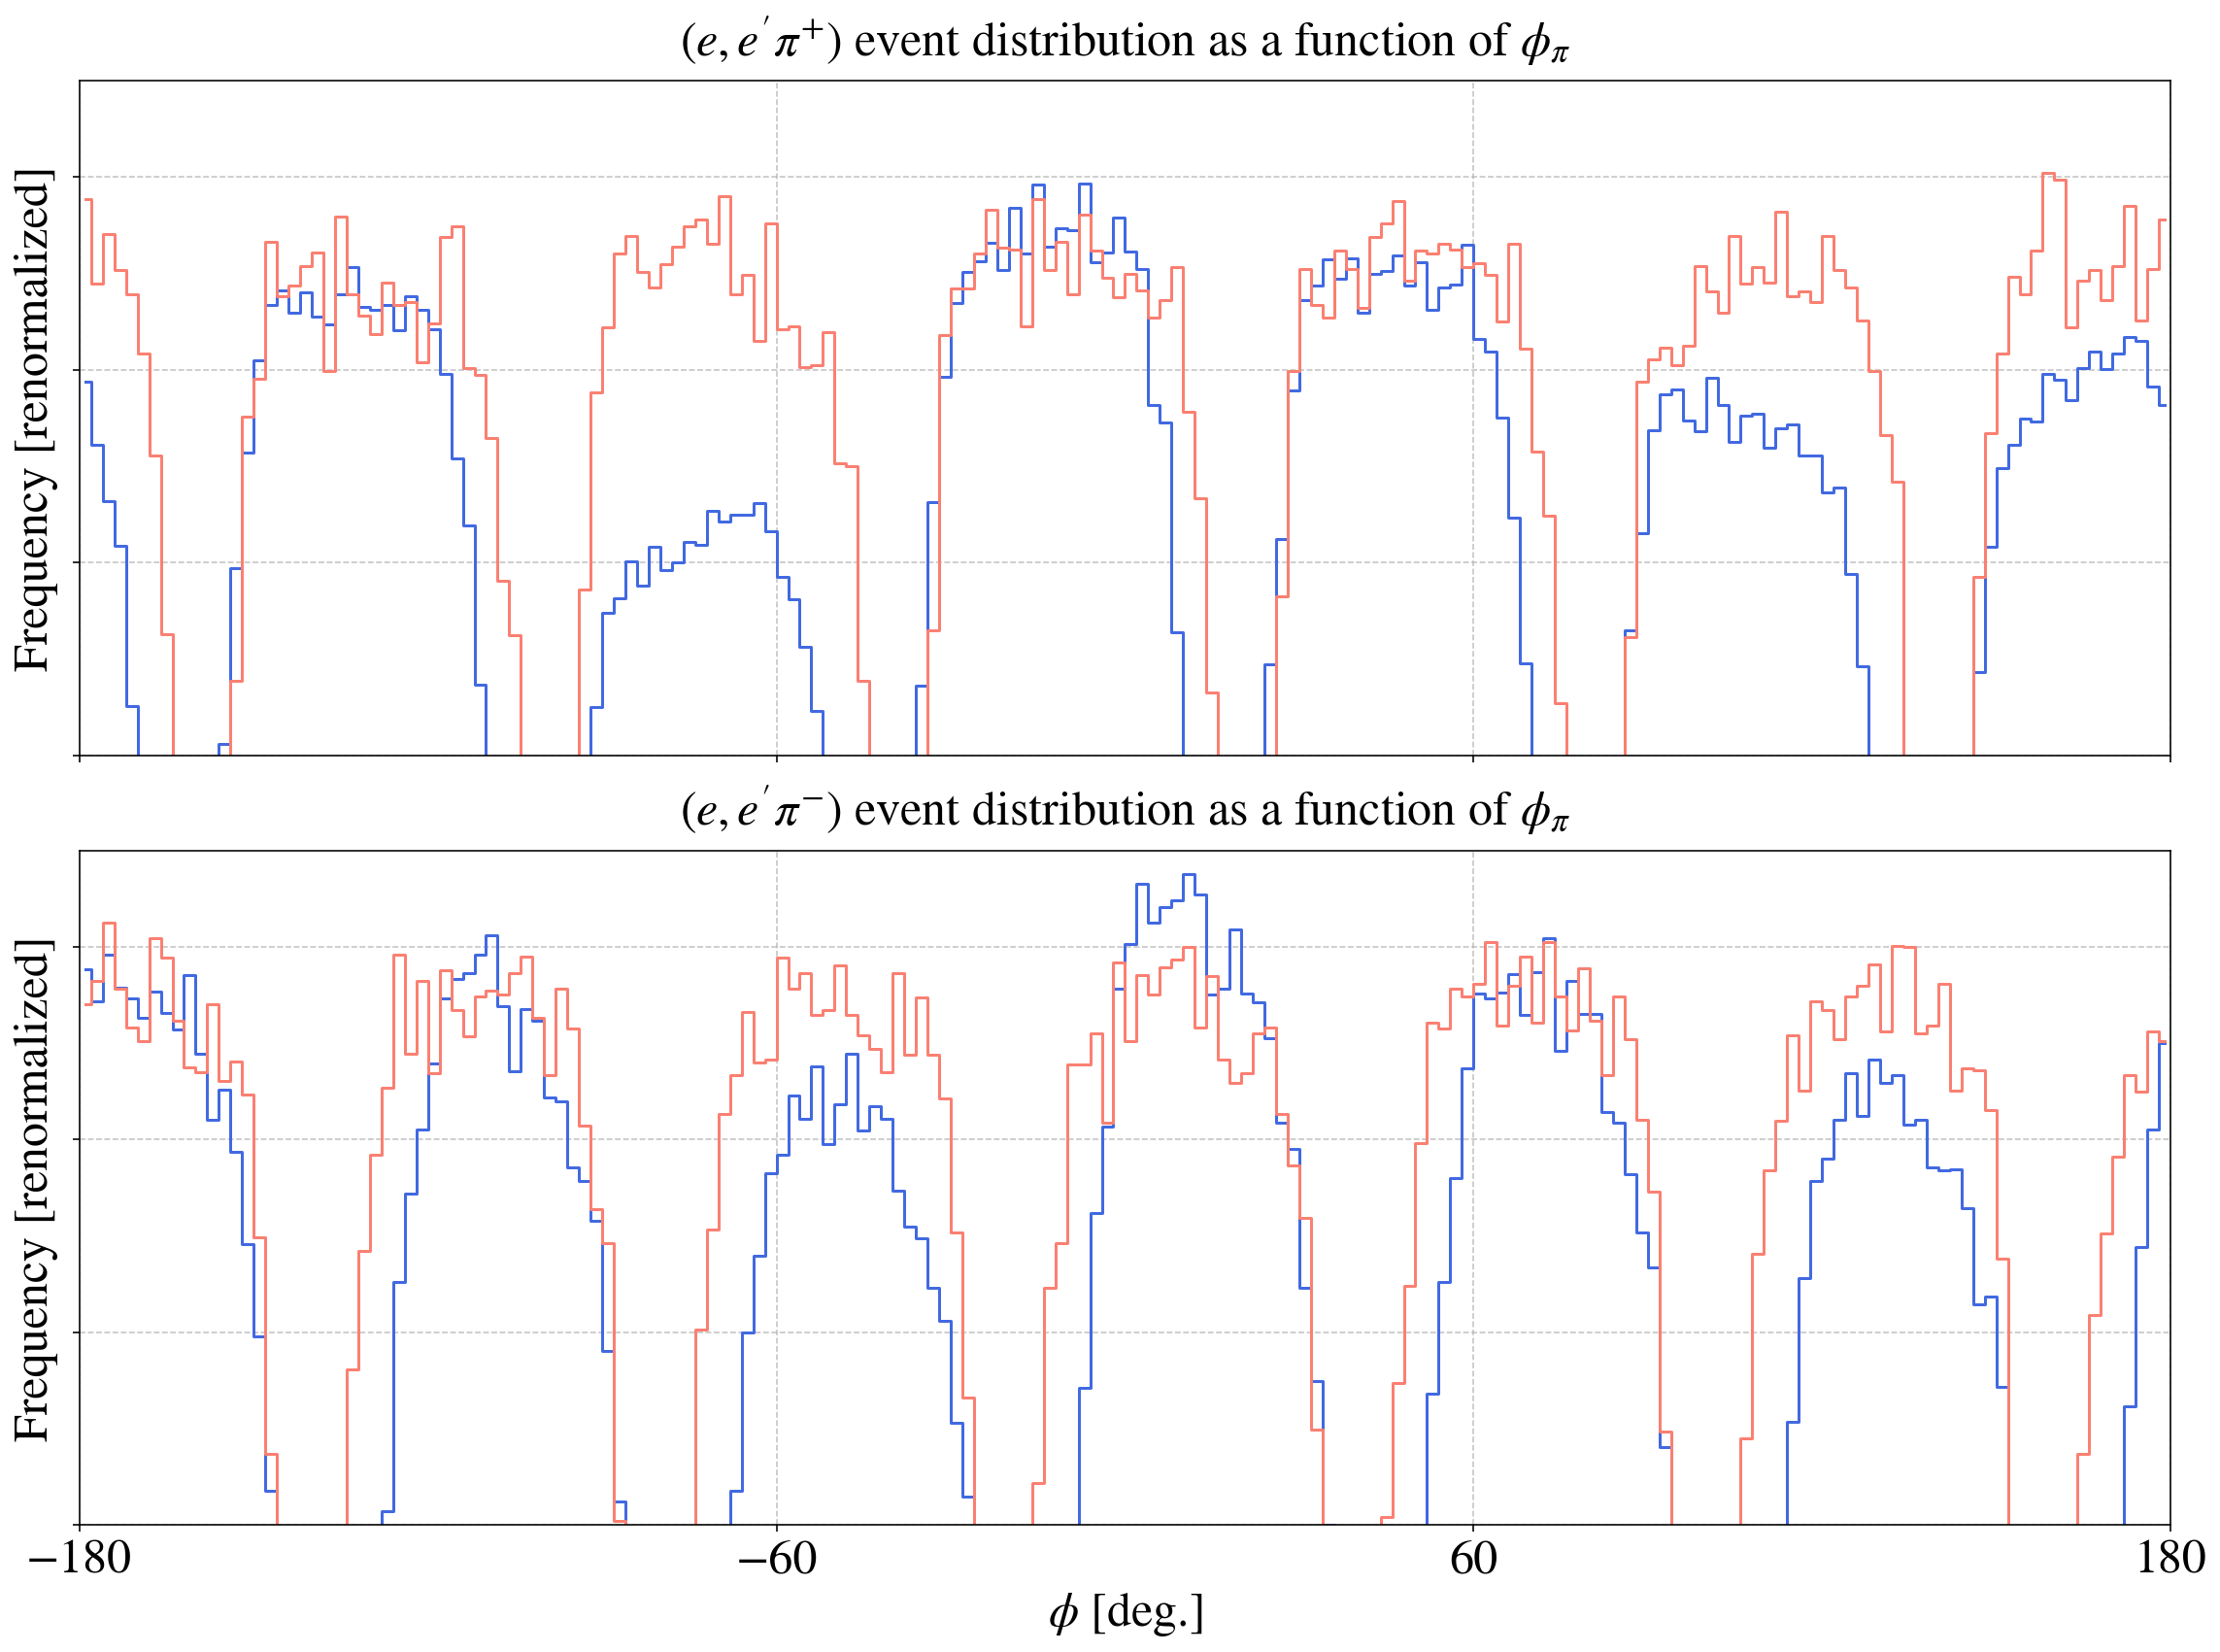

In [31]:
fig = plt.figure(figsize=(16,12));

for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(2,1,pi_idx)
    
    # second plot: data
    df  = e_e_pi_pass_cuts[pi_ch];
    phi = np.array(df.pi_Phi)*r2d
    plot_step_hist( x_arr=phi,  bins=phi_bins , label='Data',  color='royalblue', 
                   do_plot_errorbar=False, density=True, 
                   ScaleFactor=7./8., linewidth=10)
    
    df  = e_e_pi_GEMC_pass_cuts[pi_ch];
    # phi_g = np.array(df.pi_Phi_g)*r2d
    # plot_step_hist( x_arr=phi_g,  bins=phi_bins , label='GEMC-generated',  color='forestgreen', do_plot_errorbar=False, density=True)

    phi_rec = np.array(df.pi_Phi)*r2d
    plot_step_hist( x_arr=phi_rec,  bins=phi_bins , label='GEMC-reconstructed',  color='salmon', 
                   do_plot_errorbar=False, density=True, linewidth=4)

    set_axes(ax, '$\phi$ [deg.]' if pi_idx==2 else '', 
             'Frequency [renormalized]',
             title="$(e,e'"+pi_label+')$ event distribution as a function of $\phi_\pi$',
             do_add_grid=True,
             remove_ticks_x=True if pi_idx==1 else False,
             remove_ticks_y=True,
             do_add_legend=False, #True,
             ylim=(4e-3,7.5e-3),
             yticks=[4e-3,5e-3,6e-3,7e-3],
             xlim=phi_xlim,
             xticks=phi_xticks)
    
plt.tight_layout()

## Does this depend on pion momentum?

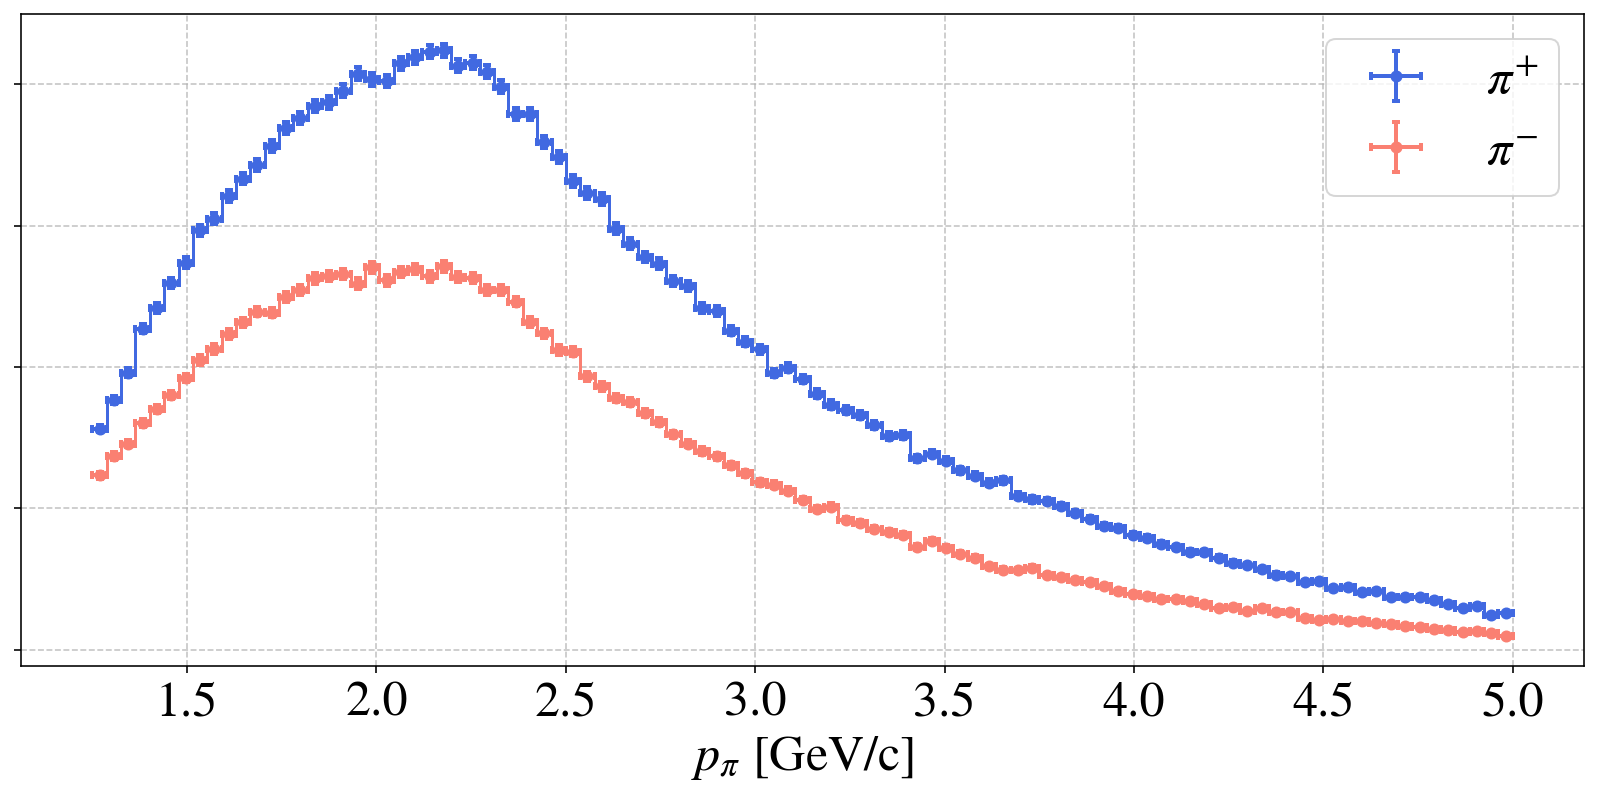

In [32]:
Pbins = np.linspace(1.25,5,100)
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    df  = e_e_pi_pass_cuts[pi_ch];
    plot_step_hist( df.pi_P, bins=Pbins, color=pi_color, label='$'+pi_label+'$' )
set_axes(ax,'$p_\pi$ [GeV/c]','',remove_ticks_y=True,title='', do_add_grid=True,do_add_legend=True);

### Does this ill-modeling of the acceptance in $\phi_\pi$ depend on momentum?

In [33]:
Ppi_mins = [1.25, 2.00,3.00, 4.00]
Ppi_maxs = [2.00,3.00, 4.00,5.00]

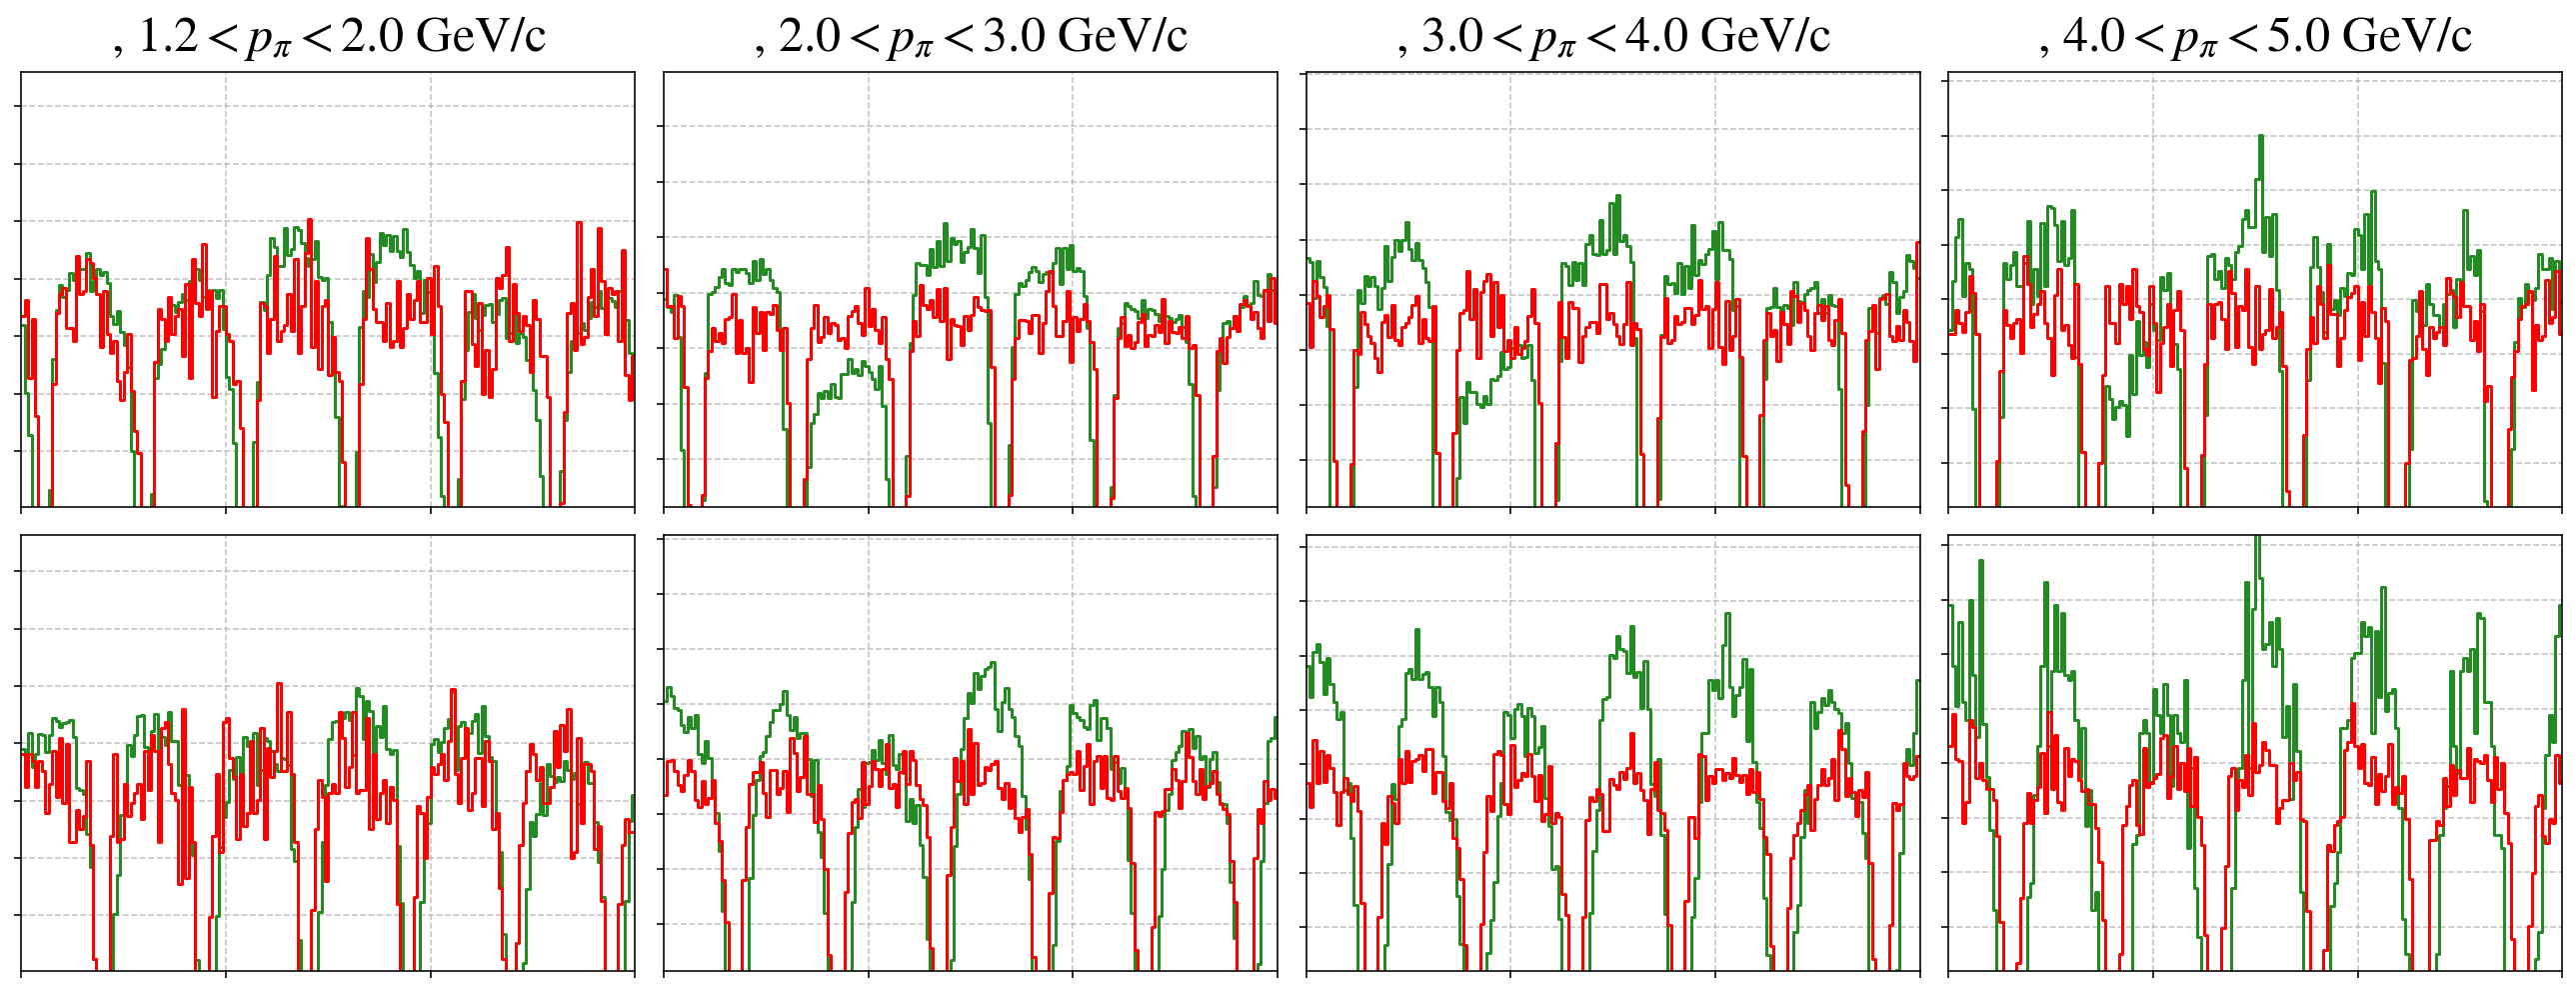

In [34]:

fig = plt.figure(figsize=(18,7));

for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{        
    for Ppi_min,Ppi_max,Ppi_idx in zip(Ppi_mins,Ppi_maxs,range(1,len(Ppi_maxs)+1)):    
        
        subplot_idx = Ppi_idx + len(Ppi_maxs)*(pi_idx-1)
        ax = fig.add_subplot(2,len(Ppi_maxs), subplot_idx)
        
        # data
        df  = e_e_pi_pass_cuts[pi_ch];        
        df = df[(Ppi_min < df.pi_P) & (df.pi_P < Ppi_max)]
        phi = np.array(df.pi_Phi)*r2d
        _,hData,_,_=plot_step_hist( x_arr=phi,  bins=phi_bins , label='Data',  color='forestgreen', do_plot_errorbar=False, density=True)

        df  = e_e_pi_GEMC_pass_cuts[pi_ch];
        df = df[(Ppi_min < df.pi_P) & (df.pi_P < Ppi_max)]
        phi_rec = np.array(df.pi_Phi)*r2d
        _,hMC,_,_=plot_step_hist( x_arr=phi_rec,  bins=phi_bins , label='GEMC-reconstructed',  color='red', do_plot_errorbar=False, density=True)

        plateau = np.median(hMC)
        
        # plt.text( -170, np.min(ax.get_ylim()) + 0.1*(np.max(ax.get_ylim())-np.min(ax.get_ylim())), "$"+pi_label+"$" , fontsize=84 )
        set_axes(ax, '$\phi$ [deg.]'if Ppi_idx>len(Ppi_maxs) else '',
                 '',
                 title= ", $%.1f < p_\pi < %.1f$ GeV/c"%(Ppi_min,Ppi_max) if pi_idx==1 else '',
                 do_add_grid=True,
                 remove_ticks_x=False if Ppi_idx>len(Ppi_maxs) else True,
                 remove_ticks_y=True,
                 do_add_legend=False,
                 # yticks=[0,4e-3,8e-3],
                 ylim=[0.5*plateau,1.75*plateau],
                 xlim=phi_xlim,
                 xticks=phi_xticks)
        
        # print(subplot_idx)
        # print("$"+pi_label+"$" + ", $%.1f < p_\pi < %.1f$ GeV/c"%(Ppi_min,Ppi_max))
        
plt.tight_layout()        

## Does this disagreement depend on electron $\phi$ angles?
Lets look at the results in different bins of electron $\phi$

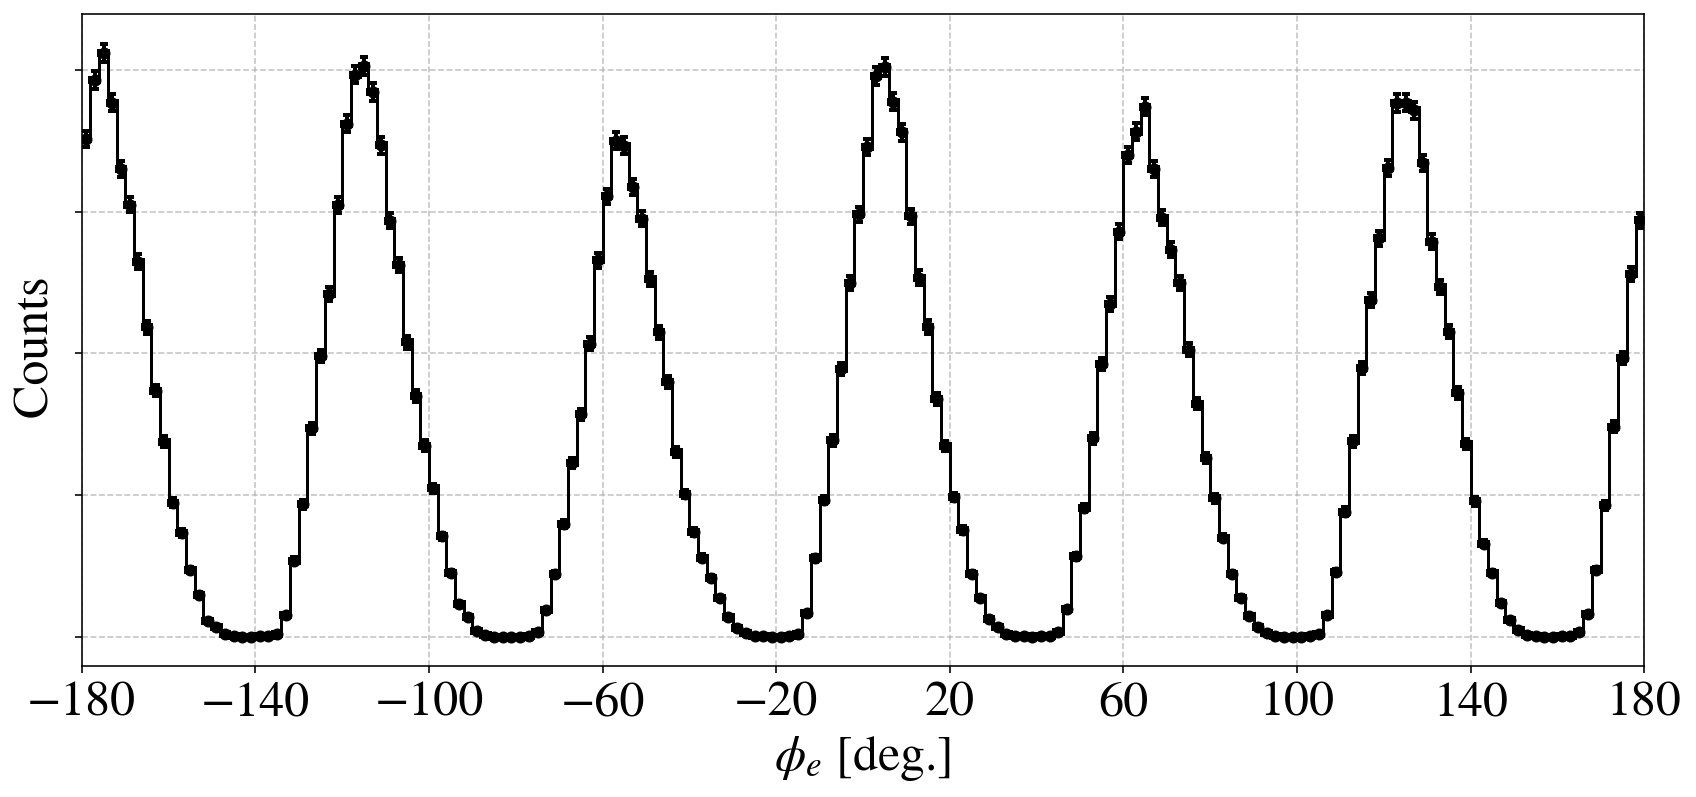